In [45]:
# Importing libraries for plotting and data analysis
%pylab inline
import warnings

# Ignore warnings 
warnings.filterwarnings('ignore')

# Configure the IPython shell
from IPython.core.interactiveshell import InteractiveShell

# Setting the display behavior to show the output of all expressions in a single cell
InteractiveShell.ast_node_interactivity = "all"

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [46]:
# Importing libraries for DA/NLP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

# tqdm for displaying progress bars during iterations
from tqdm import tqdm_notebook as tqdm
from collections import Counter

In [47]:
# Loading dataset
reviews_dataset = pd.read_csv('yelp_csv_dataset.csv')

#Dropping unwanted columns and selecting only needed columns
selected_columns = ['review_id', 'business_id', 'user_id', 'text', 'stars']
reviews_dataset = reviews_dataset[selected_columns]

# Display the modified dataset
display(reviews_dataset.head())

,review_id,business_id,user_id,text,stars
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,mh_-eMZ6K5RLWhZyISBhwA,"If you decide to eat here, just be aware it is...",3.0
1,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,OyoGAe7OKpv6SyGZT5g77Q,I've taken a lot of spin classes over the year...,5.0
2,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,Family diner. Had the buffet. Eclectic assortm...,3.0
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,_7bHUi9Uuf5__HHc_Q8guQ,"Wow! Yummy, different, delicious. Our favo...",5.0
4,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,bcjbaE6dDog4jkNY91ncLQ,Cute interior and owner (?) gave us tour of up...,4.0


In [48]:
# Check No.of Rows
print("Total No. of Reviews: {}".format(reviews_dataset.shape))

Total No. of Reviews: (100000, 5)


In [49]:
reviews_dataset.shape

(100000, 5)

In [50]:
import string

def get_clean_text(sample_review):
    # List of English stopwords from NLTK
    stopwords = nltk.corpus.stopwords.words('english')
    # Additional custom stopwords to be excluded
    newStopWords = ['ive', 'hadnt', 'couldnt', 'didnt', 'id']  
    stopwords.extend(newStopWords)

    # Original text from the sample review
    text = sample_review

    # Convert to lowercase
    text = text[2: len(sample_review)-1].lower()

    # Replace special characters with spaces
    text = text.replace('\\n', ' ').replace('\\t', ' ')

    # Remove punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    # Remove stopwords
    l = [word for word in nopunc.split() if word.lower() not in stopwords]

    # Reconstruct the cleaned text
    clean_text = " ".join(l)

    return clean_text.strip()

In [51]:
# Display the cleaned text using the get_clean_text function
sample_review = reviews_dataset.text[50]
display(get_clean_text(sample_review))

'started artichoke dip big mistake cold chips stale mentioned waitress nothing came ordered large pizza thin crust adding toppings bit pricey pizza pizza ok great except advocate server good cardinals game better try another venue next time'

In [52]:
import string

def get_words(text):
    # List of English stopwords from NLTK
    stopwords = nltk.corpus.stopwords.words('english')

    # Additional custom stopwords to be excluded
    newStopWords = ['ive', 'hadnt', 'couldnt', 'didnt', 'id']  
    stopwords.extend(newStopWords)

    # Case normalization
    text = text[2: len(text)-1].lower()
    text = text.replace('\\n', ' ').replace('\\t', ' ')

    # Display the processed text
    display(text)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    display(nopunc)

    # Remove stopwords and create a list of words
    words_list = [word for word in nopunc.split() if word.lower() not in stopwords]

    # Return the list of words and its length
    return words_list, len(words_list)

In [53]:
for i in range(1):
    # Convert the review to a string
    sample_review = str(reviews_dataset.text[i])
    print(sample_review)

    # Process the review using the get_words function
    result = get_words(sample_review)

    # Display the list of words
    display(result[0])  

If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. 

The food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.


" you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. we have tried it multiple times, because i want to like it! i have been to it's other locations in nj and never had a bad experience. \n\nthe food is good, but it takes a very long time to come out. the waitstaff is very young, but usually pleasant. we have just had too many experiences where we spent way too long waiting. we usually opt for another diner or restaurant on the weekends, in order to be done quicker"

' you decide to eat here just be aware it is going to take about 2 hours from beginning to end we have tried it multiple times because i want to like it i have been to its other locations in nj and never had a bad experience \n\nthe food is good but it takes a very long time to come out the waitstaff is very young but usually pleasant we have just had too many experiences where we spent way too long waiting we usually opt for another diner or restaurant on the weekends in order to be done quicker'

['decide',
 'eat',
 'aware',
 'going',
 'take',
 '2',
 'hours',
 'beginning',
 'end',
 'tried',
 'multiple',
 'times',
 'want',
 'like',
 'locations',
 'nj',
 'never',
 'bad',
 'experience',
 'food',
 'good',
 'takes',
 'long',
 'time',
 'come',
 'waitstaff',
 'young',
 'usually',
 'pleasant',
 'many',
 'experiences',
 'spent',
 'way',
 'long',
 'waiting',
 'usually',
 'opt',
 'another',
 'diner',
 'restaurant',
 'weekends',
 'order',
 'done',
 'quicker']

In [54]:
pd.set_option('display.precision', 2)
reviews_dataset.describe()

,stars
count,100000.00
mean,3.84
std,1.35
min,1.00
25%,3.00
50%,4.00
75%,5.00
max,5.00


In [55]:
# Count the occurrences of each unique value 
reviews_dataset["stars"].value_counts()
type(reviews_dataset["stars"].value_counts())

stars
5.0    44392
4.0    25337
3.0    11362
1.0    10921
2.0     7988
Name: count, dtype: int64

pandas.core.series.Series

([<matplotlib.patches.Wedge at 0x2510cdacfd0>,
 [Text(0.19279759757316528, 1.0829723386910748, '5-Stars'),
  Text(-0.9935222512061754, -0.4721372007777119, '4-Stars'),
  Text(0.02833384191199754, -1.0996350273624909, '1-Star'),
  Text(0.7301090542107519, -0.822764102862711, '3-Stars'),
  Text(1.0655444803646532, -0.27315739119493226, '2-Stars')],
 [Text(0.10516232594899923, 0.5907121847405862, '44.4%'),
  Text(-0.5419212279306411, -0.25752938224238825, '25.3%'),
  Text(0.015454822861089564, -0.599800924015904, '11.4%'),
  Text(0.39824130229677374, -0.44878041974329685, '10.9%'),
  Text(0.5812060801989016, -0.14899494065178123, '8.0%')])

(-1.0999999659342756,
 1.0999999983778226,
 -1.0999996903809828,
 1.0999936045386547)

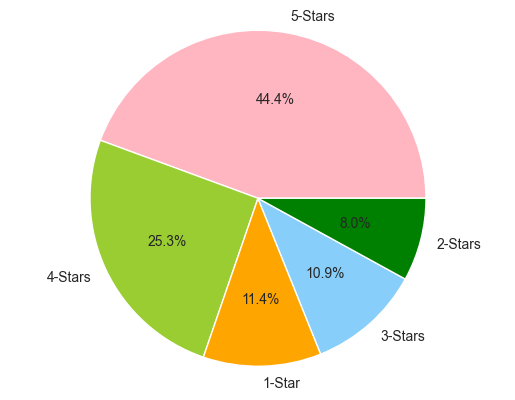

In [56]:
#Visualize the distribution
labels = '5-Stars', '4-Stars', '1-Star', '3-Stars', '2-Stars'
sizes = reviews_dataset["stars"].value_counts()
colors = ['lightpink', 'yellowgreen', 'orange', 'lightskyblue','green']
 
# Plot
plt.pie(sizes, labels=labels, colors =colors, autopct='%1.1f%%') 
plt.axis('equal')
plt.show()

In [ ]:
# Initialize an empty list to store cleaned texts
texts = []
stars = [reviews_dataset['stars'] for review in reviews_dataset]

# Iterate through rows in the reviews_dataset df
pbar = tqdm(total=reviews_dataset.shape[0] + 1)

# Iterate through each row in the DataFrame
for index, row in reviews_dataset.iterrows():
    cleaned_text = get_clean_text(row['text'])
    
    # Append the cleaned text to the texts list
    texts.append(cleaned_text)
    pbar.update(1)

pbar.close()

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,3))
vectors = vectorizer.fit_transform(texts)
# The vectors matrix now contains the numerical representation of the texts using TF-IDF

In [59]:
from sklearn.model_selection import train_test_split
#Spit the dataset into train and test parts
X_train, X_test, y_train, y_test = train_test_split(vectors, stars[1], test_size=0.15, random_state=42, shuffle =False)

In [60]:
from sklearn.svm import LinearSVC

# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
classifier.fit(X_train, y_train)

LinearSVC()

In [61]:
# Make predictions on the test set using the trained classifier
preds = classifier.predict(X_test)
print("Actual Ratings(Stars): ",end = "")
display(y_test[:5])
print("Predicted Ratings: ",end = "")
print(preds[:5])

Actual Ratings(Stars): 

85000    4.0
85001    4.0
85002    5.0
85003    5.0
85004    4.0
Name: stars, dtype: float64

Predicted Ratings: [4. 4. 5. 5. 4.]


In [62]:
X_null, X_full_test, y_null, y_full_test = train_test_split(vectors, stars[1], test_size=0.2, random_state=42, shuffle = False)

# Make predictions on the full test set using the trained classifier
predict_all = classifier.predict(X_full_test)

In [63]:
# Convert the predicted ratings to a list
predicted_stars = list(predict_all)
print("Actual Ratings(Stars): ")
print(y_full_test[-5:])

# Display the predicted ratings for the last 5 samples in the full test set
print("\nPredicted Ratings: ", end="")
print(predicted_stars[-5:])


Actual Ratings(Stars): 
99995    4.0
99996    1.0
99997    4.0
99998    2.0
99999    5.0
Name: stars, dtype: float64

Predicted Ratings: [4.0, 5.0, 4.0, 3.0, 5.0]


In [65]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.6415333333333333


In [66]:
# Calculate the precision_score and recall_scor
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(y_test, preds, average='weighted')))
print ('Recall: ' + str(recall_score(y_test, preds, average='weighted')))

Precision: 0.6138340799842749
Recall: 0.6415333333333333


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.67      0.80      0.73      1655
         2.0       0.51      0.22      0.30      1187
         3.0       0.50      0.26      0.34      1763
         4.0       0.52      0.42      0.46      3727
         5.0       0.70      0.90      0.79      6668

    accuracy                           0.64     15000
   macro avg       0.58      0.52      0.53     15000
weighted avg       0.61      0.64      0.61     15000


In [68]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<Figure size 640x480 with 0 Axes>

Confusion matrix, without normalization
[[1322  110   56   38  129]
 [ 407  257  239  143  141]
 [ 145  119  460  697  342]
 [  47    9  150 1576 1945]
 [  38    5   16  601 6008]]


<Figure size 640x480 with 0 Axes>

Normalized confusion matrix
[[7.99e-01 6.65e-02 3.38e-02 2.30e-02 7.79e-02]
 [3.43e-01 2.17e-01 2.01e-01 1.20e-01 1.19e-01]
 [8.22e-02 6.75e-02 2.61e-01 3.95e-01 1.94e-01]
 [1.26e-02 2.41e-03 4.02e-02 4.23e-01 5.22e-01]
 [5.70e-03 7.50e-04 2.40e-03 9.01e-02 9.01e-01]]


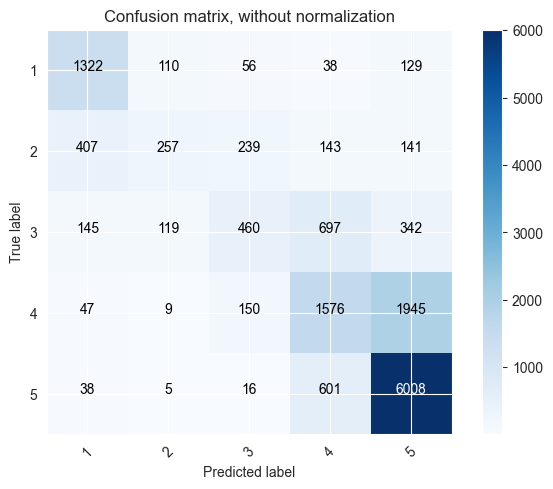

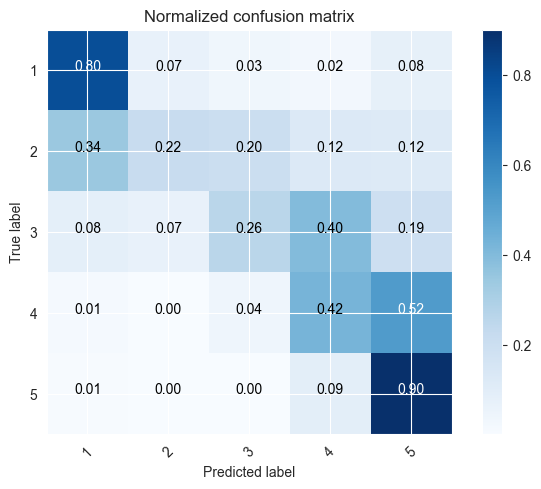

In [69]:
from sklearn import metrics
names = ['1','2','3','4','5']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [70]:
# making binary classes
sentiments = []
for star in stars[1]:
    if star <= 3:
        sentiments.append('negative')
    if star > 3:
        sentiments.append('positive')

print(len(sentiments))        

100000


In [71]:
# Split the TF-IDF vectors and corresponding binary sentiment classes (sentiments) into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(vectors, sentiments, test_size=0.20, random_state=42)

In [72]:
# Initialize a SVM for binary sentiment classification
classifier2 = LinearSVC()

# Train the classifier on the training data for binary sentiment 
classifier2.fit(X2_train, y2_train)

LinearSVC()

In [73]:
#Make predictions 
preds2 = classifier2.predict(X2_test)
print("Actual Class:    ",end = "")
print(y2_test[:10])
print("\nPredicted Class: ",end = "")
print(list(preds2[:10]))

Actual Class:    ['negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative']

Predicted Class: ['positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative']


In [74]:
#Calculate accuracy 
print(accuracy_score(y2_test, preds2))

0.9047


In [75]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(y2_test, preds2, average='weighted')))
print ('Recall: ' + str(recall_score(y2_test, preds2, average='weighted')))

Precision: 0.9044523905534119
Recall: 0.9047


In [76]:
print(classification_report(y2_test, preds2))

              precision    recall  f1-score   support

    negative       0.90      0.77      0.83      6037
    positive       0.91      0.96      0.93     13963

    accuracy                           0.90     20000
   macro avg       0.90      0.87      0.88     20000
weighted avg       0.90      0.90      0.90     20000


In [77]:
print(metrics.confusion_matrix(y2_test, preds2))


[[ 4644  1393]
 [  513 13450]]


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

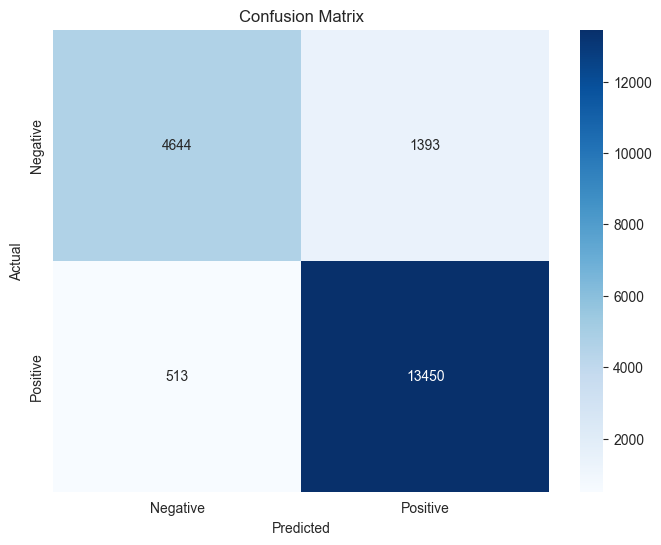

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming preds_scaled contains the predicted labels for the test set

# Compute confusion matrix
cm = confusion_matrix(y2_test, preds2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [79]:
# Compute accuracy
accuracy = accuracy_score(y2_test, preds2)
print(f'Accuracy: {accuracy:.2%}')

# Display classification report
print('Classification Report:')
print(classification_report(y2_test, preds2))

Accuracy: 90.47%
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.77      0.83      6037
    positive       0.91      0.96      0.93     13963

    accuracy                           0.90     20000
   macro avg       0.90      0.87      0.88     20000
weighted avg       0.90      0.90      0.90     20000
